In [182]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv 


from scipy.signal import find_peaks
from scipy.integrate import odeint

In [183]:
def extraction(txt):
    with open(txt, 'r') as txt_file:
        lines = txt_file.readlines()

    for i in range(len(lines)):
        lines[i] = int(lines[i])

    dataset = lines
    return dataset

In [184]:
def ISI(data, ISI_list, n_k):
    n_x = find_peaks(data, prominence=5)[0]
    n_k.append(len(n_x))

    for spike in range(1,len(n_x)):
        ISI_list.append(n_x[spike]-n_x[spike-1])

    return n_x, ISI_list, n_k

In [185]:
EEG_folders = ['F', 'N']
bin_num = 64

In [191]:
def processing(folders):
    list1 = []
    list2 = []

    for i in range(len(folders)):
        current_dir = os.getcwd()
        folder_path = os.path.join(current_dir, folders[i])
        file_list = os.listdir(folder_path)

        #Initialize empty lists
        pdt_list = [0] * 64
        ISI_list = []
        n_k = []
        
        #Itterating over all experimental samples
        for file in file_list:
            file_path = os.path.join(folder_path,file)


            if os.path.isfile(file_path):
                dataset = extraction(file_path)
                var1 = ISI(dataset, ISI_list, n_k)
                

                #For Perri-Stimulus-Time Histogram
                count, bin_edges, patches = plt.hist(var1[0], bins = bin_num, range = (0,4097))
                pdt_list = np.add(pdt_list, count)

        list1.append(ISI_list)
        list1.append(n_k)

            #For debugging
            #print(n_k)

    return list1, list2

[243]
[243, 271]
[243, 271, 331]
[243, 271, 331, 351]
[243, 271, 331, 351, 571]
[243, 271, 331, 351, 571, 254]
[243, 271, 331, 351, 571, 254, 352]
[243, 271, 331, 351, 571, 254, 352, 329]
[243, 271, 331, 351, 571, 254, 352, 329, 350]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231, 308]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231, 308, 542]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231, 308, 542, 318]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231, 308, 542, 318, 521]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231, 308, 542, 318, 521, 274]
[243, 271, 331, 351, 571, 254, 352, 329, 350, 307, 297, 299, 231, 308, 542, 318, 521, 274, 335]
[243, 271, 331, 351, 571, 254, 

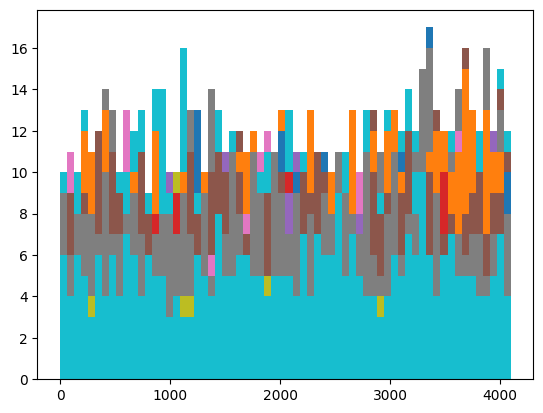

In [192]:
processed_data = processing(EEG_folders)


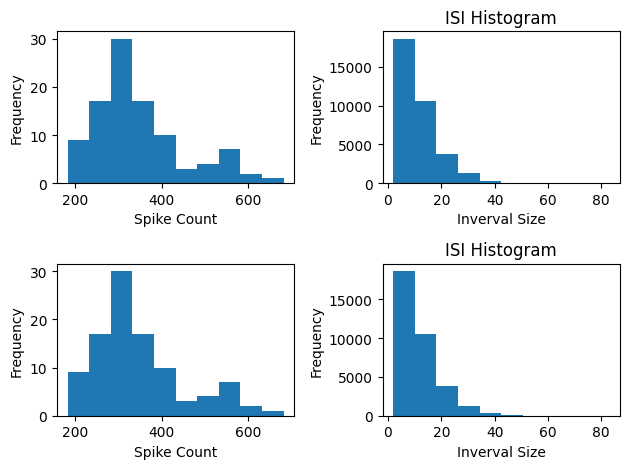

In [188]:
#Plotting the ISI Histogram and Spike Density
fig , axs = plt.subplots(2,2)
for i in range(len(EEG_folders)):
    #Histogram pertaining to n_k
    axs[i][0].hist(processed_data[0][i][2])
    axs[i][0].set_xlabel('Spike Count')
    axs[i][0].set_ylabel('Frequency')

    #Histogram pertaining to ISI_list
    axs[i][1].hist(processed_data[0][i][1])
    axs[i][1].set_ylabel('Frequency')
    axs[i][1].set_xlabel('Inverval Size')
    axs[i][1].set_title('ISI Histogram')

fig.tight_layout()

In [197]:
#NEXT CHAPTER

def FF(data):
    for i in range(len(data[0][0])):
        #Mean
        mean_n = np.mean(data[0][i][2])

        #Deviations
        dev_n = [j-mean_n for j in data[0][i][2]]

        #Variance
        var_n = np.sum([k**2 for k in dev_n])*(1/len(dev_n))

        #Fano-Factor
        F = var_n/mean_n

        list3 = [mean_n, dev_n, var_n, F]

        print(f'For dataset {EEG_folders[i]}\nmean: {list3[0]}\nvar: {list3[2]}\nF : {list3[3]}')

In [198]:
FF(processed_data)

For dataset F
mean: 348.76
var: 10540.7624
F : 30.223541690560843
For dataset N
mean: 348.76
var: 10540.7624
F : 30.223541690560843


IndexError: list index out of range

In [174]:
#PSTH Chapter
def p(dt):
    return (32/1000)*(1/196)*dt

for i in range(len(pdt_list)):
    pdt_list[i] = p(pdt_list[i])

num_bins = len(pdt_list)
bin_edges = np.linspace(0, 4097, num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

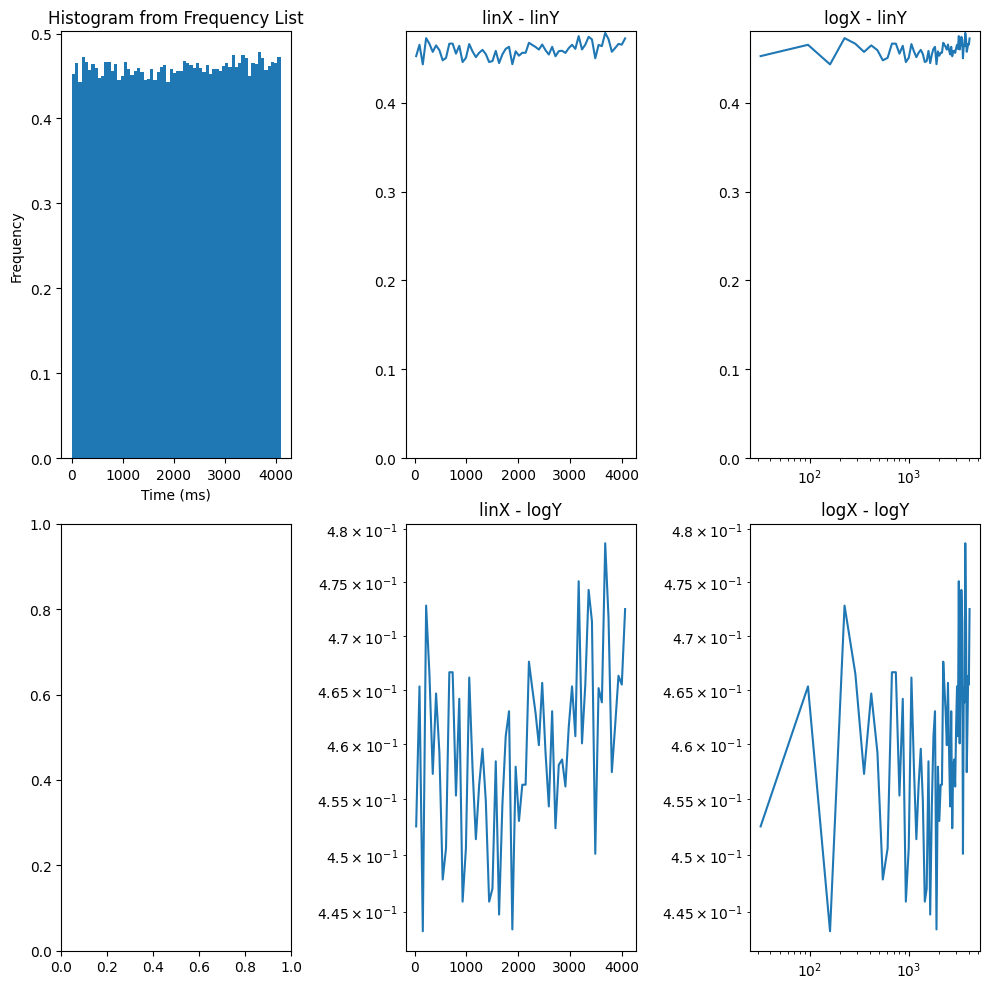

In [176]:

fig, axs = plt.subplots(2,3, figsize=(10,10))
axs[0][0].bar(bin_centers, pdt_list, width=(bin_edges[1] - bin_edges[0]))
axs[0][0].set_xlabel('Time (ms)')
axs[0][0].set_ylabel('Frequency')
axs[0][0].set_title('Histogram from Frequency List')

axs[0][1].plot([((x*(4097/64))+(4097/128)) for x in range(0,64)],pdt_list)
axs[0][1].set_ylim(bottom=0)
axs[0][1].set_title('linX - linY')

axs[0][2].plot([((x*(4097/64))+(4097/128)) for x in range(0,64)],pdt_list)
axs[0][2].set_xscale('log')
axs[0][2].set_ylim(bottom=0)
axs[0][2].set_title('logX - linY')

axs[1][1].plot([((x*(4097/64))+(4097/128)) for x in range(0,64)],pdt_list)
axs[1][1].set_yscale('log', base=10)
#axs[1][1].set_ylim(0, 10**-4)
axs[1][1].set_title('linX - logY')

axs[1][2].plot([((x*(4097/64))+(4097/128)) for x in range(0,64)],pdt_list)
axs[1][2].set_xscale('log')
axs[1][2].set_yscale('log', base=10)
#axs[1][2].set_ylim(0, 10**-4)
axs[1][2].set_title('logX - logY')

plt.tight_layout()